# Working with Pandas DataFrames

In [1]:
import numpy as np
import pandas as pd

## Creating DataFrames

Can be created from:
- Dict of 1D ndarrays, lists, tuples, dicts, or Series
- List of dicts
- 2-D ndarray
- [Structured or record](https://numpy.org/doc/stable/user/basics.rec.html) ndarray
- A Series
- Another DataFrame
- CSV, Excel, SQL or JSON file
- A list of namedtuples
- A list of dataclasses (v1.1.0+)

In [2]:
dict_of_lists = {"A": [1.0, 2.0, 3.0, 4.0], "B": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(dict_of_lists)

,A,B
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [3]:
dict_of_dicts = {"C": {100: 1, 101: 2, 102: 3}, "D": {100: 'abc', 101: 'def', 102: 'ghi'}}
pd.DataFrame(dict_of_dicts)

,C,D
100,1,abc
101,2,def
102,3,ghi


In [4]:
# Subset of data from the 2022 Stack Overflow Developer Survey
df = pd.read_csv('languages.csv')
df

,Name,Percent used
0,JavaScript,65.36
1,HTML/CSS,55.08
2,SQL,49.43
3,Python,48.07


## Working with columns

A `DataFrame` is like a `dict` that contains `Series` objects with the same index.

We can can get, set and delete columns as if they were in a `dict`.

In [5]:
df['Name']  # Getting a column

0    JavaScript
1      HTML/CSS
2           SQL
3        Python
Name: Name, dtype: object

In [6]:
df['Percent not used'] = 100 - df['Percent used']  # Add a new column
df

,Name,Percent used,Percent not used
0,JavaScript,65.36,34.64
1,HTML/CSS,55.08,44.92
2,SQL,49.43,50.57
3,Python,48.07,51.93


In [7]:
not_used = df.pop('Percent not used')  # Removes and returns the column
not_used

0    34.64
1    44.92
2    50.57
3    51.93
Name: Percent not used, dtype: float64

<AxesSubplot:xlabel='Name'>

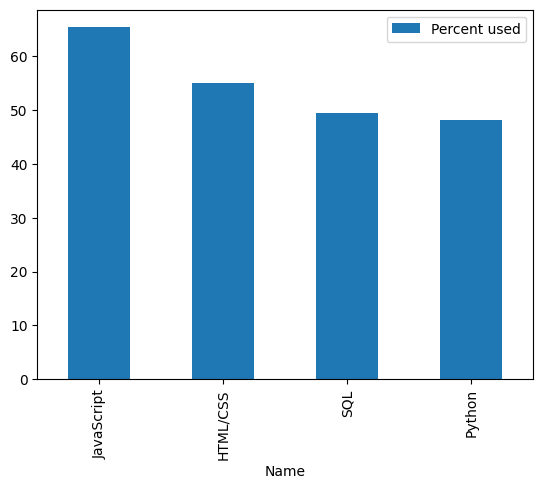

In [8]:
df.plot(kind='bar', x='Name')

## Example: Plotting over years

### Update the dataframe so the 'Percent used' is multiple columns based on year

In [9]:
df.rename(columns={'Percent used': '2022'}, inplace=True)
df

,Name,2022
0,JavaScript,65.36
1,HTML/CSS,55.08
2,SQL,49.43
3,Python,48.07


### Add more years of data

Randomly update the percent used from the previous year by +-5

In [10]:
from random import random

for year in range(2021, 2017,  -1):
    df[str(year)] = df[str(year+1)] + [(round(random(), 3) * 10 - 5) for i in range(4)]
df

,Name,2022,2021,2020,2019,2018
0,JavaScript,65.36,62.32,60.04,61.28,59.92
1,HTML/CSS,55.08,56.99,54.11,52.17,54.87
2,SQL,49.43,48.25,45.75,43.44,44.76
3,Python,48.07,45.51,44.16,48.82,45.71


In [17]:
df.index = df.pop('Name')
df

,2022,2021,2020,2019,2018
Name,,,,,
JavaScript,65.36,62.32,60.04,61.28,59.92
HTML/CSS,55.08,56.99,54.11,52.17,54.87
SQL,49.43,48.25,45.75,43.44,44.76
Python,48.07,45.51,44.16,48.82,45.71


In [18]:
df.sort_index(axis='columns', inplace=True)
df

,2018,2019,2020,2021,2022
Name,,,,,
JavaScript,59.92,61.28,60.04,62.32,65.36
HTML/CSS,54.87,52.17,54.11,56.99,55.08
SQL,44.76,43.44,45.75,48.25,49.43
Python,45.71,48.82,44.16,45.51,48.07


<AxesSubplot:xlabel='Name'>

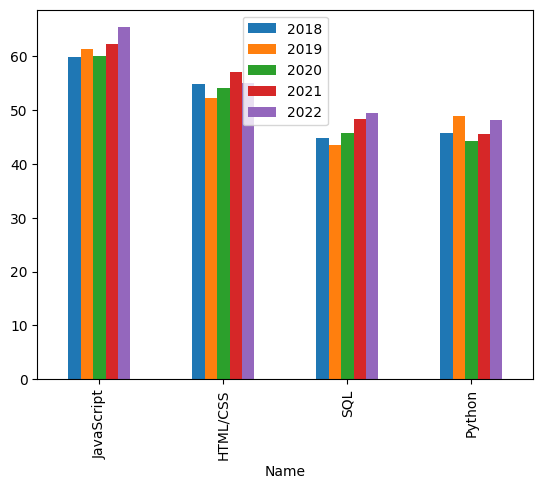

In [19]:
df.plot.bar()

In [21]:
df2 = df.T
df2

Name,JavaScript,HTML/CSS,SQL,Python
2018,59.92,54.87,44.76,45.71
2019,61.28,52.17,43.44,48.82
2020,60.04,54.11,45.75,44.16
2021,62.32,56.99,48.25,45.51
2022,65.36,55.08,49.43,48.07


<AxesSubplot:>

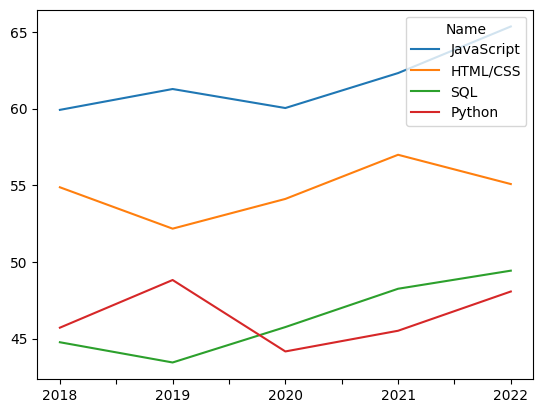

In [22]:
df2.plot()